In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [2]:
DATA = pd.read_excel("BigData.xlsx")

In [41]:
elements = pd.read_excel("Material Database finale.xlsx")

In [42]:
import re
def get_dict(element):
    l= {}
    res = re.findall('[A-Z][^A-Z]*', element)
    for element in res:
        if '.' in element :
            l[re.findall("(\d+\.\d+|[A-Za-z]+)", element)[0]] = float(re.findall('(\d+\.\d+|[A-Za-z]+)', element )[1])
        if len(re.findall('(\d+|[A-Za-z]+)', element )) == 2 :
            l[re.findall('(\d+|[A-Za-z]+)', element )[0]] = float(re.findall('(\d+|[A-Za-z]+)', element )[1])
        if len(re.findall('(\d+|[A-Za-z]+)', element )) == 1 :
            l[re.findall('(\d+|[A-Za-z]+)', element )[0]] = 1     
    return l

In [43]:
elements = elements[['Elements ','CO2 footprint min (CO2/mol)', 'CO2 footprint max (CO2/mol)',
       'Energy footprint min (MJ/mol)', 'Energy footprint max (MJ/mol)', 'HHI', 'ESG Score', 'Supply risk',
       'World production (tons per year)', 'World reserve (tons)', 'Companionality']]

In [44]:
import time
from tqdm import tqdm

In [45]:
DATA.columns

Index(['Alloy', 'Etat d'entropie', 'system', 'A', 'delta', 'TM', 'DELTA_TM',
       'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K',
       'Delta K'],
      dtype='object')

In [7]:
DATA = DATA[DATA["Etat d'entropie"] == 1]

In [8]:
total_iterations = DATA.shape[0]

In [9]:
diff_alloy = DATA["Alloy"]
diff_alloy_list = diff_alloy.to_list()

In [13]:
DATA.shape[0]

30201

In [14]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
FCO2_min = {}
for alloy in diff_alloy_list:
    fCO2_min = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    progress_bar.update(1)
    for element in propotion_dict.keys():
        ri = elements[elements['Elements '] == element ]['CO2 footprint min (CO2/mol)'].reset_index(drop=True)[0]
        ci = propotion_dict[element]/somme_stch
        fCO2_min = fCO2_min + ri*ci
    FCO2_min[alloy] = fCO2_min
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de CO2 footprint min (CO2/mol):", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:29<00:00, 335.64iteration/s]

Temps écoulé de CO2 footprint min (CO2/mol): 89.9792423248291 secondes


In [15]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
FCO2_max = {}
for alloy in diff_alloy_list:
    fCO2_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['CO2 footprint max (CO2/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fCO2_max = fCO2_max + ri*ci
    FCO2_max[alloy] = fCO2_max
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:33<00:00, 321.69iteration/s]

Temps écoulé de A: 93.8814857006073 secondes


In [64]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
FE_min = {}
for alloy in diff_alloy_list:
    fE_min = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Energy footprint min (MJ/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fE_min = fE_min + ri*ci
    FE_min[alloy] = fE_min
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:37<00:00, 310.19iteration/s]

Temps écoulé de A: 97.36339354515076 secondes


In [65]:
FE_min

{'Al-Au-Cu-Pd-Ta': 19811.4753838668,
 'Al-Mo-Ni-Ta-Zn': 155.0528029468,
 'Al-Ir-Mo-Os-Ta': 4233.5293384668,
 'Al-Ir-Mo-Os-Ti': 4090.5018690668003,
 'Al-Au-Cu-Pd-V': 19699.0610828668,
 'Al-Ir-Mo-Os-V': 4121.1150374668005,
 'Al-Pd-Ti-Y-Zr': 3805.1685634668006,
 'Al-Ir-Mo-Os-W': 4105.3727384668,
 'Al-Pd-Ti-Zn-Zr': 3780.8397666668006,
 'Al-Ir-Mo-Os-Zn': 4085.7152216668005,
 'Al-Ir-Mo-Os-Zr': 4113.0643928668005,
 'Al-Co-Ir-V-W': 1800.1635674248005,
 'Al-Mo-Ni-Ti-V': 47.425149346800005,
 'Al-Mo-Ni-Ti-W': 31.682850346800002,
 'Al-Mo-Ni-Ti-Zn': 12.0253335468,
 'Al-Mo-Ni-Ti-Zr': 39.3745047468,
 'Al-Ir-Mo-Pd-Pt': 47239.281338466804,
 'Al-Pt-Re-Rh-Ru': 68046.5201784668,
 'Al-Ir-Mo-Pd-Re': 5798.179418466801,
 'Al-Mo-Ni-V-W': 62.2960187468,
 'Al-Ir-Mo-Pd-Rh': 31012.985338466802,
 'Al-Ir-Mo-Pd-Ru': 5960.270138466801,
 'Al-Mo-Ni-V-Zn': 42.6385019468,
 'Al-Pt-Re-Rh-Ta': 67725.9343784668,
 'Al-Pt-Re-Rh-Ti': 67582.9069090668,
 'Al-Ir-Mo-Pd-Ta': 5639.684338466801,
 'Al-Pt-Re-Rh-V': 67613.5200774668,
 'Al

In [58]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
FE_max = {}
for alloy in diff_alloy_list:
    fE_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Energy footprint max (MJ/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fE_max = fE_max + ri*ci
    FE_max[alloy] = fE_max
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:38<00:00, 306.48iteration/s]

Temps écoulé de A: 98.54228496551514 secondes


In [18]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
HHI = {}
for alloy in diff_alloy_list:
    hhi = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['HHI'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            hhi = hhi + ri*ci
    HHI[alloy] = hhi
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:35<00:00, 315.18iteration/s]

Temps écoulé de A: 95.82270431518555 secondes


In [19]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
ESG = {}
for alloy in diff_alloy_list:
    esg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['ESG Score'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            esg = esg + ri*ci
    ESG[alloy] = esg
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:26<00:00, 350.93iteration/s]

Temps écoulé de A: 86.05995059013367 secondes


In [20]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
SR = {}
for alloy in diff_alloy_list:
    sr = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Supply risk'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            sr = sr + ri*ci
    SR[alloy] = sr
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time
print("Temps écoulé de A:", elapsed_time, "secondes")

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:25<00:00, 351.22iteration/s]

Temps écoulé de A: 85.98983526229858 secondes


In [46]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
C_avg = {}
for alloy in diff_alloy_list:
    c_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Companionality'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            c_avg = c_avg + ri*ci
    C_avg[alloy] = c_avg
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:33<00:00, 321.75iteration/s]


In [24]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
P_avg = {}
for alloy in diff_alloy_list:
    p_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['World production (tons per year)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            p_avg = p_avg + ri*ci
    P_avg[alloy] = p_avg
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time


Calcul en cours:   0%|                                                                | 0/30201 [00:13<?, ?iteration/s]

Calcul en cours:   9%|████▍                                               | 2598/30201 [00:07<01:11, 384.87iteration/s]


Calcul en cours:  16%|████████▍                                           | 4921/30201 [00:14<01:49, 230.04iteration/s]


Calcul en cours:  23%|███████████▉                                        | 6948/30201 [00:22<01:16, 304.92iteration/s]


Calcul en cours:  30%|███████████████▊                                    | 9189/30201 [00:29<01:08, 308.68iteration/s]


Calcul en cours:  37%|██████████████████▊                                | 11159/30201 [00:37<01:10, 271.36iteration/s]


Calcul en cours:  43%|█████████████████████▉                             | 12994/30201 [00:45<01:30, 189.47iteration/s]


Calcul en cours:  48%|████████████████████████▌                          | 14545/30201 [00:53<00:50, 310.13iteration/s]


Calcul en cours:  55%|████████████████████████████▏                      | 16689/30201 [01:00<00:41, 328.65iteration/s]


Calcul en cours:  63%|███████████████████████████████▉                   | 18929/30201 [01:08<00:43, 260.28iteration/s]


Calcul en cours:  70%|███████████████████████████████████▊               | 21207/30201 [01:15<00:27, 332.08iteration/s]


Calcul en cours:  78%|███████████████████████████████████████▉           | 23650/30201 [01:23<00:18, 357.04iteration/s]


Calcul en cours:  85%|███████████████████████████████████████████▌       | 25775/30201 [01:30<00:24, 180.56iteration/s]


Calcul en cours:  93%|███████████████████████████████████████████████▎   | 28001/30201 [01:38<00:06, 325.49iteration/s]


Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:45<00:00, 285.98iteration/s]


In [26]:
from tqdm import tqdm
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
R_avg = {}
for alloy in diff_alloy_list:
    r_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['World reserve (tons)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            r_avg = r_avg + ri*ci
    R_avg[alloy] = r_avg
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:33<00:00, 323.70iteration/s]


In [48]:
N = 10000
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
R_max = {}
for alloy in diff_alloy_list:
    R_max[alloy] = r_max(alloy,N)
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:33<00:00, 323.52iteration/s]


In [49]:
N = 10000
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
P_max = {}
for alloy in diff_alloy_list:
    P_max[alloy] = p_max(alloy,N)
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:40<00:00, 299.71iteration/s]


In [50]:
total_iterations = DATA.shape[0]
progress_bar = tqdm(total=total_iterations, desc='Calcul en cours', unit='iteration')
start_time = time.time()
C_max = {}
for alloy in diff_alloy_list:
    C_max[alloy] = c_max(alloy)
    progress_bar.update(1)
progress_bar.close()
elapsed_time = time.time() - start_time

Calcul en cours: 100%|███████████████████████████████████████████████████| 30201/30201 [01:40<00:00, 299.29iteration/s]


In [66]:
d1 = pd.DataFrame(FCO2_min.values(), index=FCO2_min.keys(), columns=["FCO2_min"]).reset_index()
d2 = pd.DataFrame(FCO2_max.values(), index=FCO2_max.keys(), columns=["FCO2_max"]).reset_index()
d3 = pd.DataFrame(FE_min.values(), index=FE_min.keys(), columns=["FE_min"]).reset_index()
d4 = pd.DataFrame(FE_max.values(), index=FE_max.keys(), columns=["FE_max"]).reset_index()
d5 = pd.DataFrame(HHI.values(), index=HHI.keys(), columns=["HHI"]).reset_index()
d6 = pd.DataFrame(ESG.values(), index=SR.keys(), columns=["ESG"]).reset_index()
d7 = pd.DataFrame(SR.values(), index=FCO2_min.keys(), columns=["SR"]).reset_index()
d8 = pd.DataFrame(C_avg.values(), index=C_avg.keys(), columns=["C_avg"]).reset_index()
d9 = pd.DataFrame(P_avg.values(), index=P_avg.keys(), columns=["P_avg"]).reset_index()
d10 = pd.DataFrame(R_avg.values(), index=R_avg.keys(), columns=["R_avg"]).reset_index()
d11 = pd.DataFrame(C_max.values(), index=C_max.keys(), columns=["C_max"]).reset_index()
d12 = pd.DataFrame(P_max.values(), index=P_max.keys(), columns=["P_max"]).reset_index()
d13 = pd.DataFrame(R_max.values(), index=R_max.keys(), columns=["R_max"]).reset_index()

In [56]:
type(FCO2_min)

dict

In [67]:
lis = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13]
merged = d1
for i in range(1,13):
    merged = pd.merge(merged ,lis[i], on = "index")

In [68]:
merged.columns

Index(['index', 'FCO2_min', 'FCO2_max', 'FE_min', 'FE_max', 'HHI', 'ESG', 'SR',
       'C_avg', 'P_avg', 'R_avg', 'C_max', 'P_max', 'R_max'],
      dtype='object')

In [72]:
merged.to_excel("hhh.xlsx", index=False)

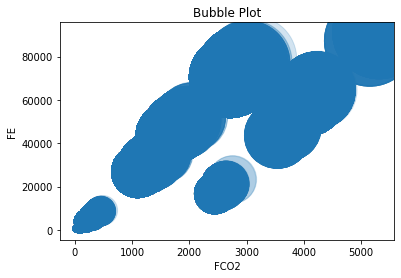

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

av_x = merged[['FCO2_min', 'FCO2_max']].mean(axis=1)
av_y = merged[['FE_min', 'FE_max']].mean(axis=1)

a = np.square(av_x - merged['FCO2_min'])
b = np.square(av_y - merged['FE_min'])

sizes = np.sqrt(a+b)*2

# Create the bubble plot
plt.scatter(av_x, av_y, s=sizes, alpha=0.2)
plt.plot(1000,20000)

# Add labels and title to the plot
plt.xlabel('FCO2')
plt.ylabel('FE')
plt.title('Bubble Plot')

# Show the plot
plt.show()


********************

In [57]:
def fCO2_min(alloy):
    fCO2_min = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['CO2 footprint min (CO2/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fCO2_min = fCO2_min + ri*ci
    return(fCO2_min)

def fCO2_max(alloy):
    fCO2_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['CO2 footprint max (CO2/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fCO2_max = fCO2_max + ri*ci
    return(fCO2_max)

def fE_min(alloy):
    fE_min = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Energy footprint min (MJ/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fE_min = fE_min + ri*ci
    return(fE_min)

def fE_max(alloy):
    fE_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Energy footprint max (MJ/mol)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            fE_max = fE_max + ri*ci
    return(fE_max)

def hhi(alloy):
    hhi = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['HHI'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            hhi = hhi + ri*ci
    return(hhi)

def esg(alloy):
    esg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['ESG Score'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            esg = esg + ri*ci
    return(esg)

def Supply_risk(alloy):
    sr = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Supply risk'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            sr = sr + ri*ci
    return(sr)

def c_max(alloy):
    c_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    l = []
    for element in propotion_dict.keys():
        l.append(elements[elements['Elements '] == element ]['Companionality'].reset_index(drop=True)[0])
    c_max = max(l)
    return(c_max)

def p_max(alloy,N):
    p_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    l = []
    for element in propotion_dict.keys():
        l.append(elements[elements['Elements '] == element ]['World production (tons per year)'].reset_index(drop=True)[0])
    p_max = (1/min(l))*N
    return(p_max)

def r_max(alloy,N):
    r_max = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    l = []
    for element in propotion_dict.keys():
        l.append(elements[elements['Elements '] == element ]['World reserve (tons)'].reset_index(drop=True)[0])
    r_max = (1/min(l))*N
    return(r_max)

def c_avg(alloy):
    c_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['Companionality'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            c_avg = c_avg + ri*ci
    return(c_avg)

def p_avg(alloy):
    p_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['World production (tons per year)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            p_avg = p_avg + ri*ci
    return(p_avg)

def r_avg(alloy):
    r_avg = 0
    propotion_dict = get_dict(alloy)
    somme_stch = sum(propotion_dict.values())
    for element in propotion_dict.keys():
            ri = elements[elements['Elements '] == element ]['World reserve (tons)'].reset_index(drop=True)[0]
            ci = propotion_dict[element]/somme_stch
            r_avg = r_avg + ri*ci
    return(r_avg)

In [33]:
elements.columns

Index(['Elements ', 'Z', 'Molar Mass (g/mol)', 'Companionality',
       'CO2 footprint min (CO2/kg)', 'CO2 footprint max (CO2/kg)',
       'Energy footprint min (MJ/kg)', 'Energy footprint max (MJ/kg)',
       'CO2 footprint min (CO2/mol)', 'CO2 footprint max (CO2/mol)',
       'Energy footprint min (MJ/mol)', 'Energy footprint max (MJ/mol)', 'HHI',
       'ESG Score', 'Supply risk', 'World production (tons per year)',
       'World reserve (tons)'],
      dtype='object')

In [31]:
elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Elements                          40 non-null     object 
 1   CO2 footprint min (CO2/mol)       40 non-null     float64
 2   CO2 footprint max (CO2/mol)       40 non-null     float64
 3   Energy footprint min (MJ/mol)     40 non-null     float64
 4   Energy footprint max (MJ/mol)     40 non-null     float64
 5   HHI                               40 non-null     float64
 6   ESG Score                         40 non-null     float64
 7   Supply risk                       40 non-null     float64
 8   World production (tons per year)  40 non-null     float64
 9   World reserve (tons)              40 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.2+ KB
